In [24]:
import pandas as pd

df = pd.read_csv("data_vancouver_copy.csv",encoding = "ISO-8859-1")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [25]:
# PRICE
df = df.dropna(subset=['price'])
# convert string to integer
df['price'] = df['price'].replace('[\$\,\.]', '', regex=True).astype(int)
df['price']

0       1065000
1        948000
2       2470000
3       1299000
4       2190000
         ...   
1155     524900
1156     799000
1157     599999
1158     599900
1159     599000
Name: price, Length: 1158, dtype: int32

In [26]:
df = df.dropna(subset=['price','Gross Taxes for 2020','Property Age','Lot Size'])
df['Gross Taxes for 2020'] = df['Gross Taxes for 2020'].replace('[\$\,\.]', '', regex=True)

for i,x in enumerate(df['Gross Taxes for 2020']):
    try:
        df['Gross Taxes for 2020'][i] = float(x)
    except:
        df['Gross Taxes for 2020'][i] = None
df['Gross Taxes for 2020']

<ipython-input-26-f3bfddc78bf5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross Taxes for 2020'][i] = float(x)
<ipython-input-26-f3bfddc78bf5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross Taxes for 2020'][i] = None


0        481
1        508
2       7109
3        517
4        545
        ... 
1155     253
1156     106
1157     422
1158     106
1159     422
Name: Gross Taxes for 2020, Length: 1158, dtype: object

In [27]:
# filter house only rows
df = df[df['Property Type'] == 'House']
df['Property Type']

2       House
6       House
7       House
8       House
9       House
        ...  
1127    House
1128    House
1134    House
1138    House
1146    House
Name: Property Type, Length: 457, dtype: object

In [28]:
df['Sub-Area/Community'].nunique()

28

In [34]:
# PROPERTY AGE
def braket_removal(s):
    return s[s.find("(")+1:s.find(")")]

def return_num(s):
    idx = s.find(' ')
    return s[:idx]

df['Property Age'] = df['Property Age'].apply(braket_removal).apply(return_num).astype(int)



AttributeError: 'int' object has no attribute 'find'

In [35]:
df['Property Age']

2       91
6       98
7        7
8       33
9       79
        ..
1127     0
1128    59
1134    97
1138     4
1146    53
Name: Property Age, Length: 457, dtype: int32

In [45]:
# Lot Size
def braket(s):
    return s[s.find("(")+1:s.find(")")]

def return_num(s):
    idx = s.find(' ')
    return s[:idx]

def isdigit(s):
    return s.isdigit()

df['Lot Size'] = df['Lot Size'].apply(braket).apply(return_num).astype(float)


AttributeError: 'float' object has no attribute 'find'

In [50]:
df['Property Age'].sum()

20794

In [46]:
df = df[df['Lot Size'].apply(lambda x: isinstance(x, float))]

In [49]:
df['Lot Size']

2       4026.0
6       6250.0
7       5129.0
8       6240.0
9       4026.0
         ...  
1127    6994.0
1128    4512.0
1134    6039.0
1138    4594.0
1146    4837.0
Name: Lot Size, Length: 457, dtype: float64

In [74]:
df

,address,price,Bedrooms,Bath,Lot Size,Property Age,Gross Taxes for 2020,Area,Sub-Area/Community,Property Type,Title,Style
2,2781 W 15th Avenue,2470000,4.0,3.0,4026.0,91,7109,Vancouver West,Kitsilano,House,Freehold NonStrata,1 Storey
6,2070 W 14th Avenue,3788000,8.0,4.0,6250.0,98,10423,Vancouver West,Kitsilano,House,Freehold NonStrata,Reverse 2 Storey w/Bsmt
7,2917 W 20th Avenue,4288000,5.0,5.0,5129.0,7,12652,Vancouver West,Arbutus,House,Freehold NonStrata,2 Storey w/Bsmt.
8,2688 W 19th Avenue,3800000,6.0,6.0,6240.0,33,11176,Vancouver West,Arbutus,House,Freehold NonStrata,2 Storey
9,3008 W 21st Avenue,2780000,2.0,1.0,4026.0,79,7278,Vancouver West,Arbutus,House,Freehold NonStrata,1 Storey
...,...,...,...,...,...,...,...,...,...,...,...,...
1127,4140 Gladstone Street,3288000,10.0,7.0,6994.0,0,450,Vancouver East,Victoria East,House,Freehold NonStrata,2 Storey w/Bsmt.
1128,1896 E 40th Avenue,1780000,6.0,6.0,4512.0,59,342,Vancouver East,Victoria East,House,Freehold NonStrata,2 Storey
1134,1635 E 21st Avenue,3199800,4.0,3.0,6039.0,97,761,Vancouver East,Victoria East,House,Freehold NonStrata,3 Storey
1138,1885 E 35th Avenue,2838000,10.0,8.0,4594.0,4,380,Vancouver East,Victoria East,House,Freehold NonStrata,"2 Storey w/Bsmt.,Laneway House"


In [78]:
import matplotlib.pyplot as plt

plt.close("all")

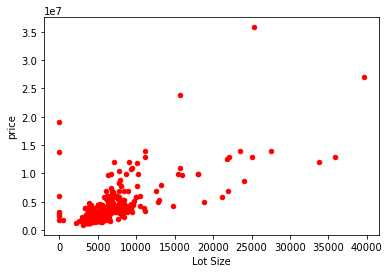

In [85]:
import matplotlib.pyplot as plt

# a scatter plot comparing num_children and num_pets
df.plot(kind='scatter',x='Lot Size',y='price',color='red')
plt.show()

In [81]:
df.columns


Index(['address', 'price', 'Bedrooms', 'Bath', 'Lot Size', 'Property Age',
       'Gross Taxes for 2020', 'Area', 'Sub-Area/Community', 'Property Type',
       'Title', 'Style'],
      dtype='object')

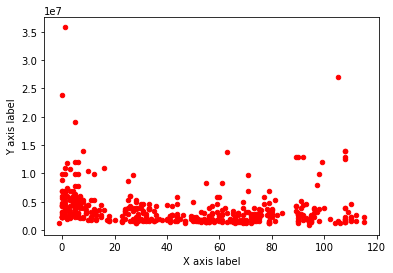

In [84]:
import matplotlib.pyplot as plt

# a scatter plot comparing num_children and num_pets
df.plot(kind='scatter',x='Property Age',y='price',color='red')
plt.xlabel("X axis label")
plt.ylabel("Y axis label")
plt.show()

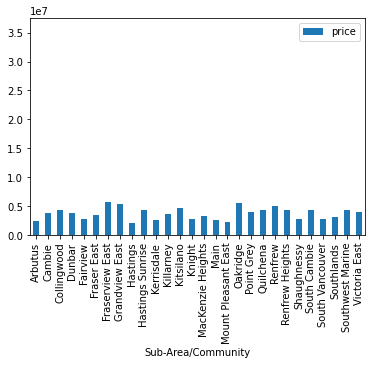

In [90]:
df.plot(kind='bar',x='Sub-Area/Community',y='price')
df.groupby('Sub-Area/Community')['price'].nunique().plot(kind='bar')
plt.show()


In [92]:
df[['Sub-Area/Community']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.show()

TypeError: no numeric data to plot